In [196]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "3"

$minor
[1] "4.2"

$year
[1] "2017"

$month
[1] "09"

$day
[1] "28"

$`svn rev`
[1] "73368"

$language
[1] "R"

$version.string
[1] "R version 3.4.2 (2017-09-28)"

$nickname
[1] "Short Summer"

In [197]:
# install.packages("vioplot",, repos='https://cloud.r-project.org/')
# library(vioplot)

In [198]:
datos=read.csv2('datos_escalas.csv')
estr=datos[8:18]
neg_estr=c(2,3,5,6,7,9)
#Codificar Negativwes en cuestionario de estrés
for (nreact in neg_estr){
    estr[,nreact]=(estr[,nreact]-1)**2}  

fact_estres_internos=c (5,6,8,10)
fact_estres_externos=c (1,3,4)
fact_estres_moduladores=c (2,6,9,11)

estr_int=rowSums(estr[,fact_estres_internos])
estr_ext=rowSums(estr[,fact_estres_externos])
estr_mod=rowSums(estr[,fact_estres_moduladores])

estr_tot=rowSums(estr)

ans=datos[19:31]
ans_fisiologico=c (1, 2, 9, 12 )
ans_conductual=c (3, 7, 8 )
ans_cognitivo=c (4, 5, 6, 10, 11, 13 )

ans_fis=rowSums(ans[,ans_fisiologico])
ans_cond=rowSums(ans[,ans_conductual])
ans_cog=rowSums(ans[,ans_cognitivo])

ans_tot=rowSums(ans)

In [199]:
str(datos)

'data.frame':	222 obs. of  33 variables:
 $ num        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sexo       : int  1 2 2 1 2 2 1 1 1 2 ...
 $ edad       : int  24 19 21 23 20 24 20 22 22 24 ...
 $ programa   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ estrato    : int  3 2 2 2 2 3 2 3 3 3 ...
 $ est_civl   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ocup       : int  1 2 1 1 1 1 1 1 1 1 ...
 $ Estr_1     : int  0 0 1 1 1 1 1 1 0 1 ...
 $ Estr_2     : int  0 1 1 0 1 1 1 1 1 1 ...
 $ Estr_3     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Estr_4     : int  1 0 1 0 1 1 0 1 0 1 ...
 $ Estr_5     : int  0 1 0 1 1 0 0 0 1 0 ...
 $ Estr_6     : int  0 0 1 1 0 0 0 1 0 0 ...
 $ Estr_7     : int  1 0 0 0 0 0 1 1 1 0 ...
 $ Estr_8     : int  1 1 0 0 0 0 1 0 0 1 ...
 $ Estr_9     : int  0 0 0 1 0 0 1 1 0 0 ...
 $ Estr_10    : int  1 0 1 1 0 0 1 1 0 1 ...
 $ Estr_11    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Ans_1      : int  1 0 0 0 0 1 0 0 0 1 ...
 $ Ans_2      : int  1 1 1 0 0 0 0 1 0 1 ...
 $ Ans_3      : int  0 0 1 1 0 1 0 1 0 1 ...
 $ 

# Demográficos


In [200]:
datos$programa=factor(datos$programa, labels=c(
"Cont",#"Contaduria Pública", 
"Rad",#"Radiologia", 
"Entr",#"Entrenamiento Deportivo", 
"Psic",#"Psicología", 
"Admon",#"""Administración de Empresas", 
"Merc",#"Mercadeo y Públicidad", 
"Der",#"Derecho", 
"TerResp",#"Terapia Respiratoria", 
"DisGraf",#"Diseño Grafico", 
"NegInt"#"Negocios Internaciones"
))


   Cont     Rad    Entr    Psic   Admon    Merc     Der TerResp DisGraf  NegInt 
     10      27      27      29      36      31      25      13      12      12 

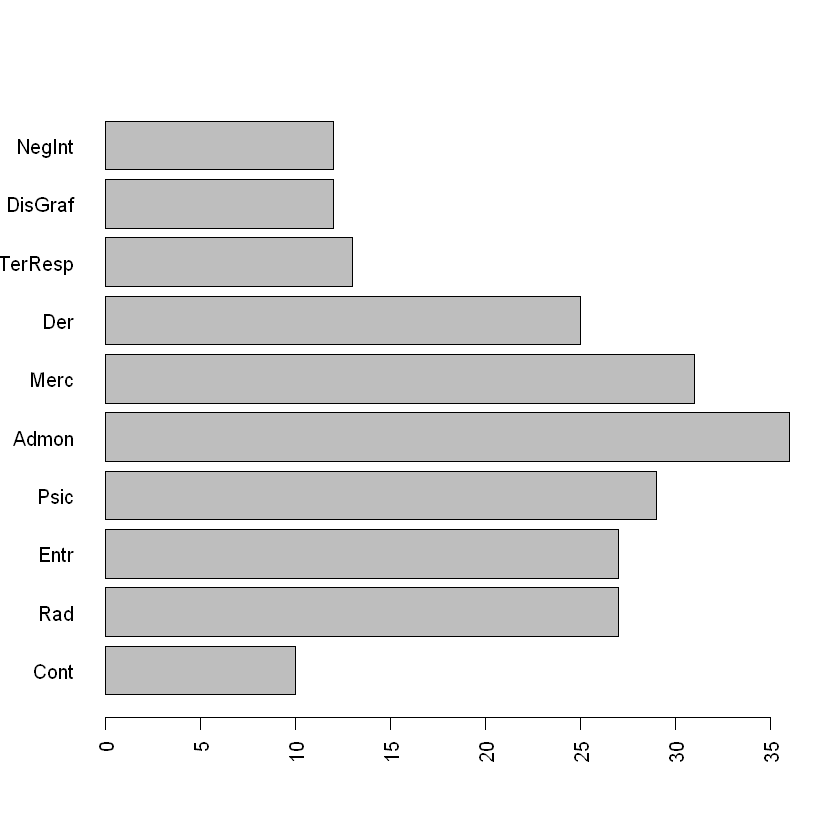

In [201]:
plot(datos$programa, horiz=TRUE,las=2)
table(datos$programa)



# Ansiedad

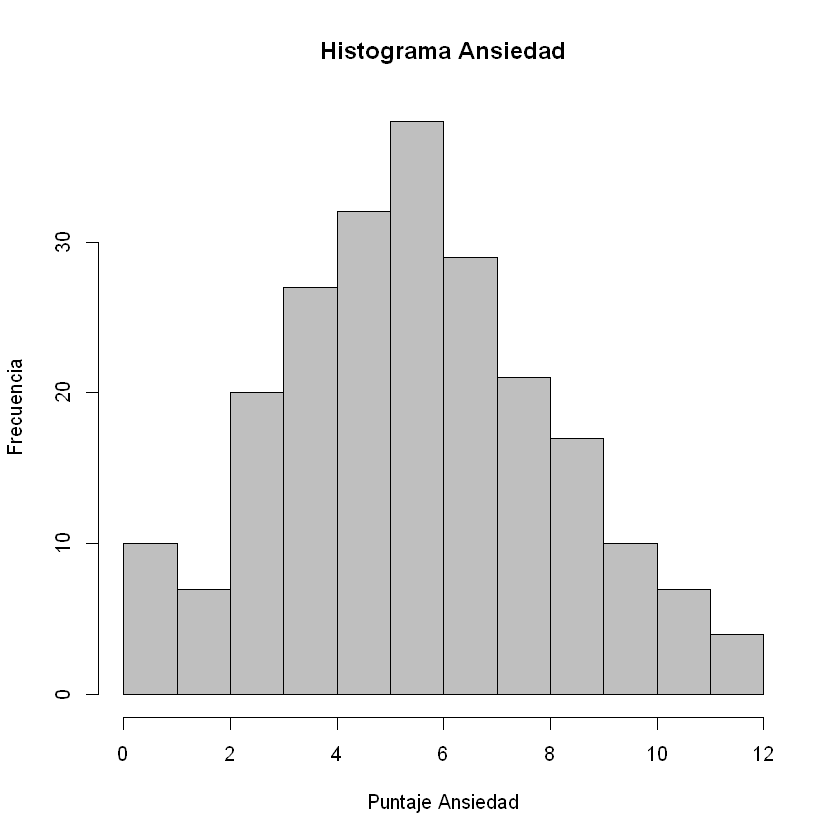

In [202]:
hist(ans_tot, col="gray75", main="Histograma Ansiedad",ylab="Frecuencia", xlab="Puntaje Ansiedad")

In [203]:
ans_prog_tbl=table(data.frame(datos$ans_riesgo,datos$programa))
print(round(prop.table(ans_prog_tbl,2),2))

                datos.programa
datos.ans_riesgo Cont  Rad Entr Psic Admon Merc  Der TerResp DisGraf NegInt
               1 0.20 0.30 0.07 0.17  0.06 0.29 0.16    0.15    0.33   0.00
               2 0.40 0.63 0.56 0.41  0.64 0.55 0.60    0.62    0.50   0.67
               3 0.40 0.07 0.37 0.41  0.31 0.16 0.24    0.23    0.17   0.33


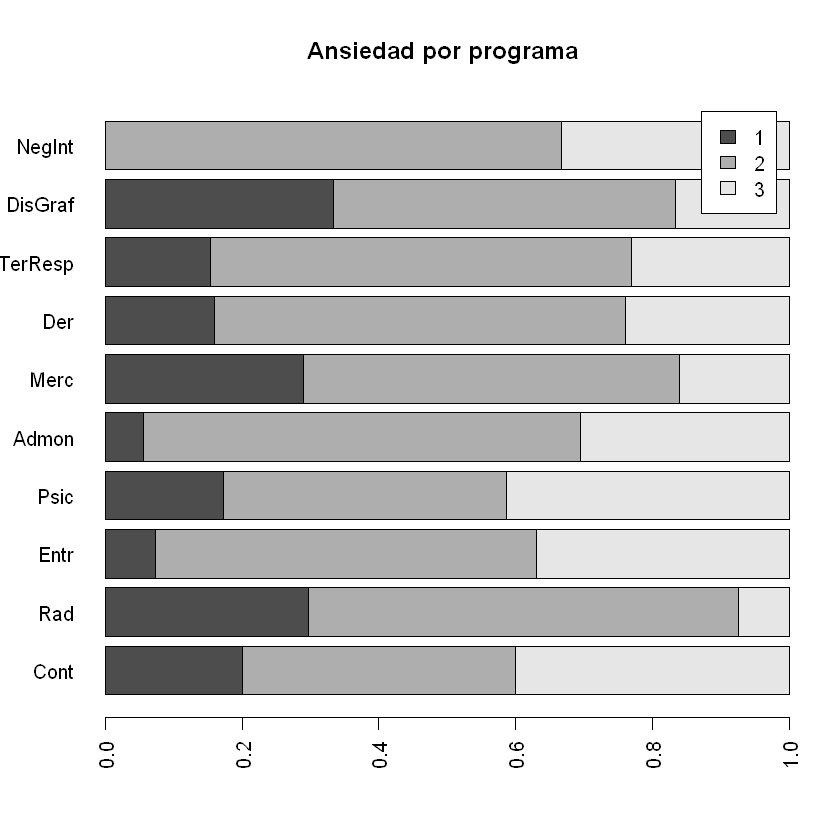

In [204]:
barplot(prop.table(ans_prog_tbl,2), horiz=TRUE,las=2, legend=TRUE, main="Ansiedad por programa")

                datos.programa
datos.ans_riesgo Cont Rad Entr Psic Admon Merc Der TerResp DisGraf NegInt
               1    2   8    2    5     2    9   4       2       4      0
               2    4  17   15   12    23   17  15       8       6      8
               3    4   2   10   12    11    5   6       3       2      4

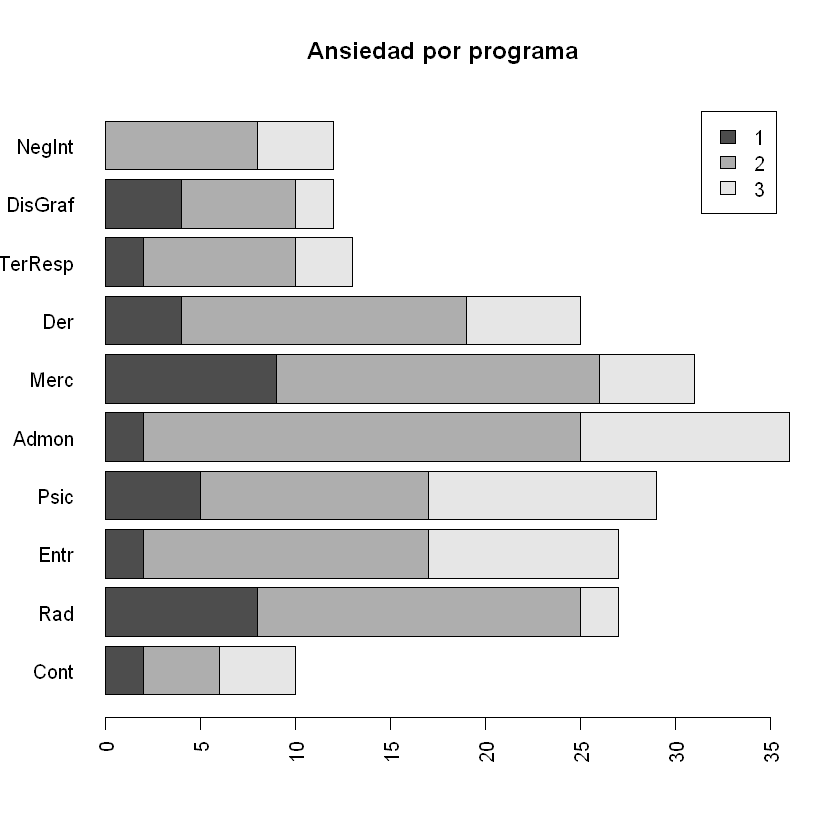

In [205]:
ans_prog_tbl
barplot(ans_prog_tbl, horiz=TRUE,las=2, legend=TRUE, main="Ansiedad por programa")

### Canales de respuesta


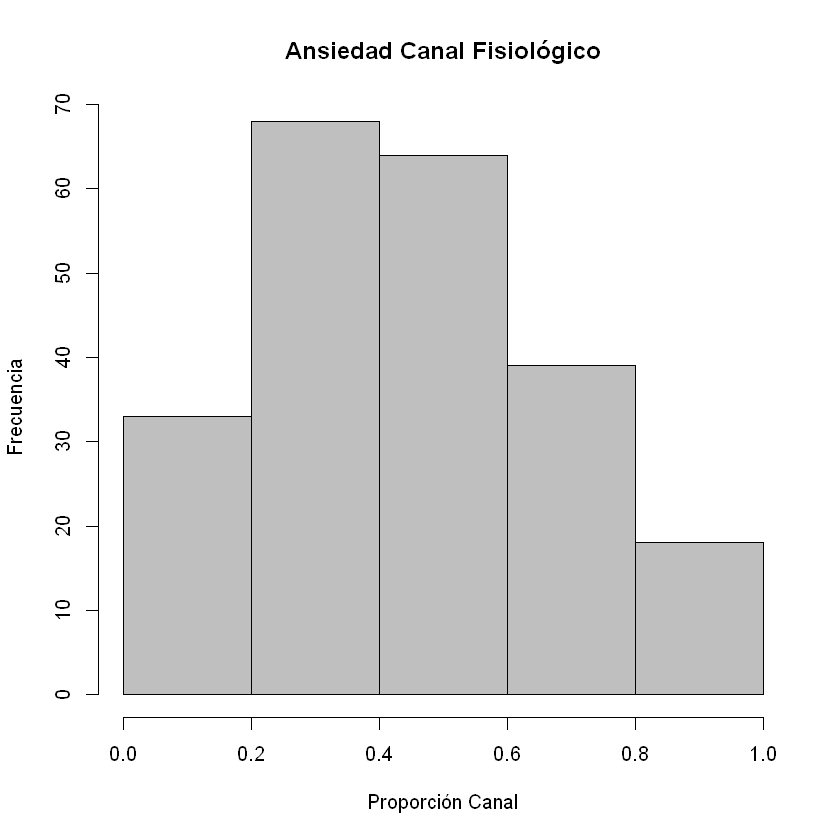

In [206]:
hist(ans_fis/4, col="gray75", main="Ansiedad Canal Fisiológico", xlab="Proporción Canal", ylab="Frecuencia", breaks = 5)
#ans_fis/4

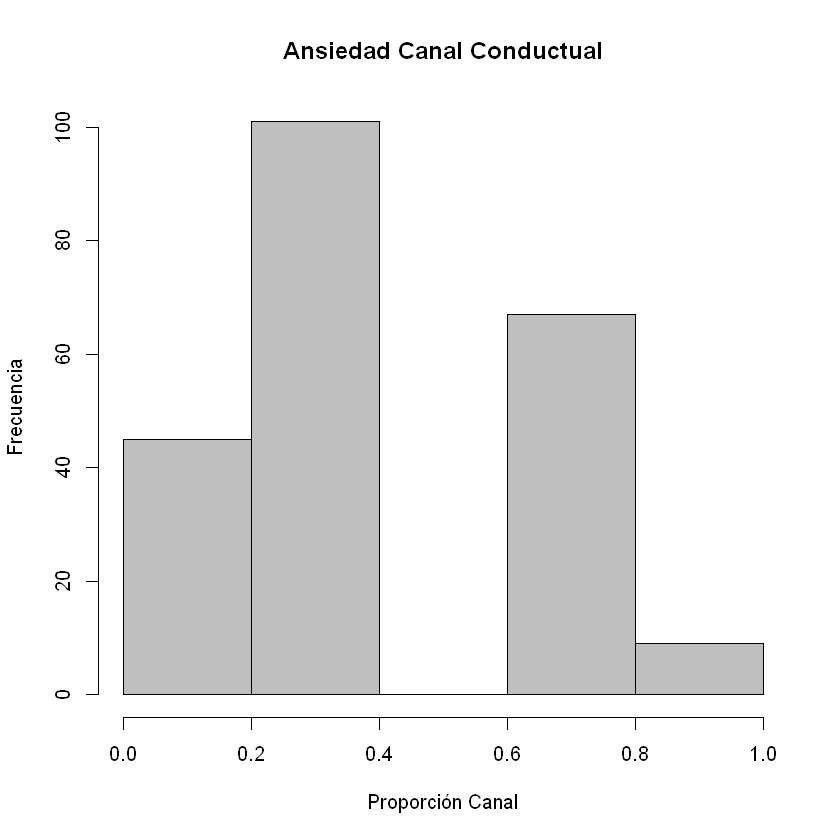

In [207]:
hist(ans_cond/3, col="gray75", main="Ansiedad Canal Conductual", xlab="Proporción Canal", ylab="Frecuencia", breaks = 5)


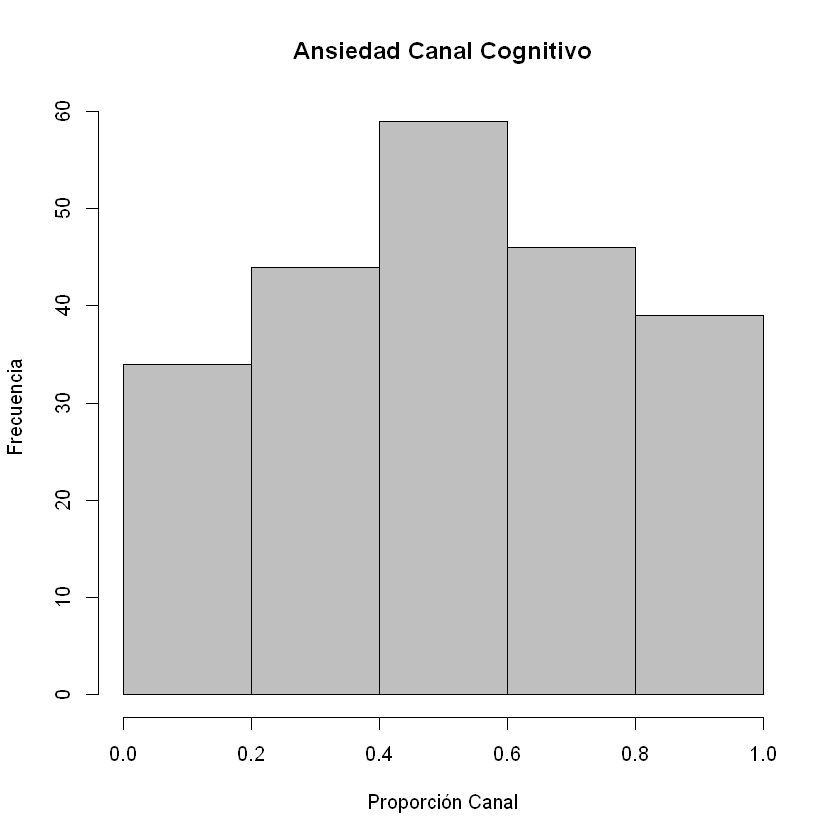

In [208]:
hist(ans_cog/6, col="gray75", main="Ansiedad Canal Cognitivo", xlab="Proporción Canal", ylab="Frecuencia", breaks = 5)

In [209]:
ans_proporciones_canal=data.frame(Fisiológico=ans_fis/4, Conductual=ans_cond/3, Cognitivo=ans_cog/6)

Fisiológico  Conductual   Cognitivo 
       0.43        0.39        0.51

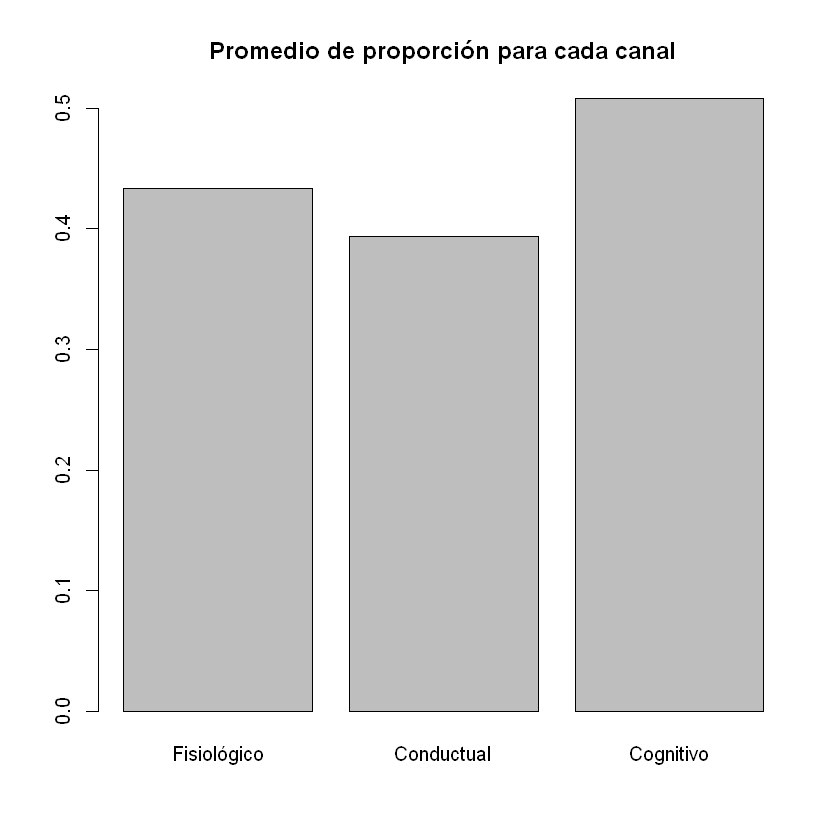

In [210]:
barplot(colMeans(ans_proporciones_canal), main="Promedio de proporción para cada canal")
round(colMeans(ans_proporciones_canal),2)

## Estrés


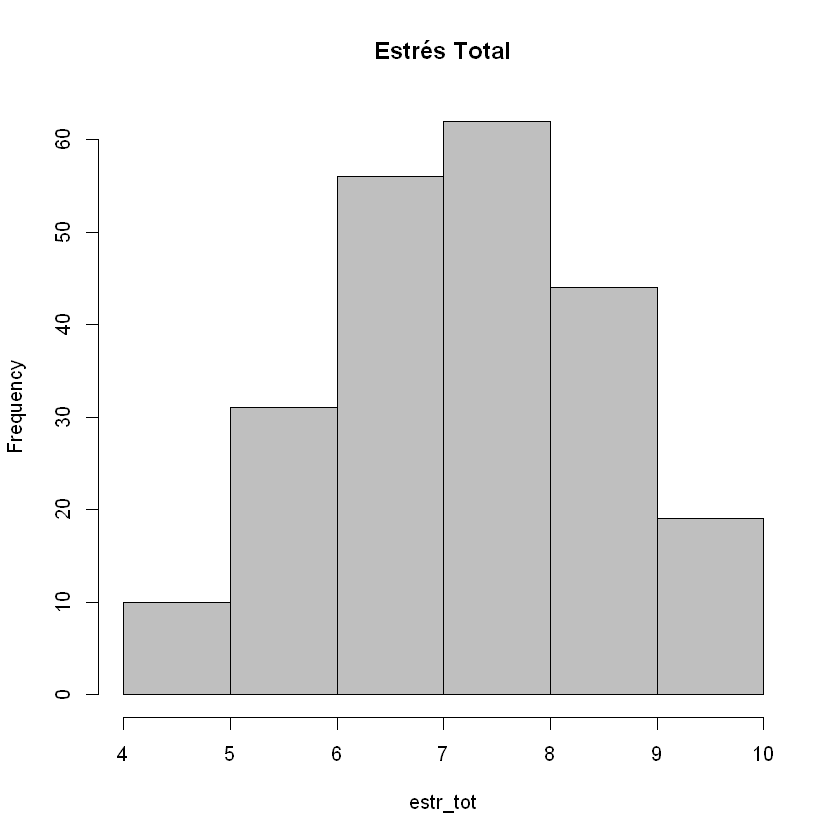

In [211]:
hist(estr_tot, col="gray75", main="Estrés Total", breaks = 5)

In [212]:
estr_prog_tbl=table(data.frame(datos$estr_riesgo,datos$programa))
round(prop.table(ans_prog_tbl,2),2)

                datos.programa
datos.ans_riesgo Cont  Rad Entr Psic Admon Merc  Der TerResp DisGraf NegInt
               1 0.20 0.30 0.07 0.17  0.06 0.29 0.16    0.15    0.33   0.00
               2 0.40 0.63 0.56 0.41  0.64 0.55 0.60    0.62    0.50   0.67
               3 0.40 0.07 0.37 0.41  0.31 0.16 0.24    0.23    0.17   0.33

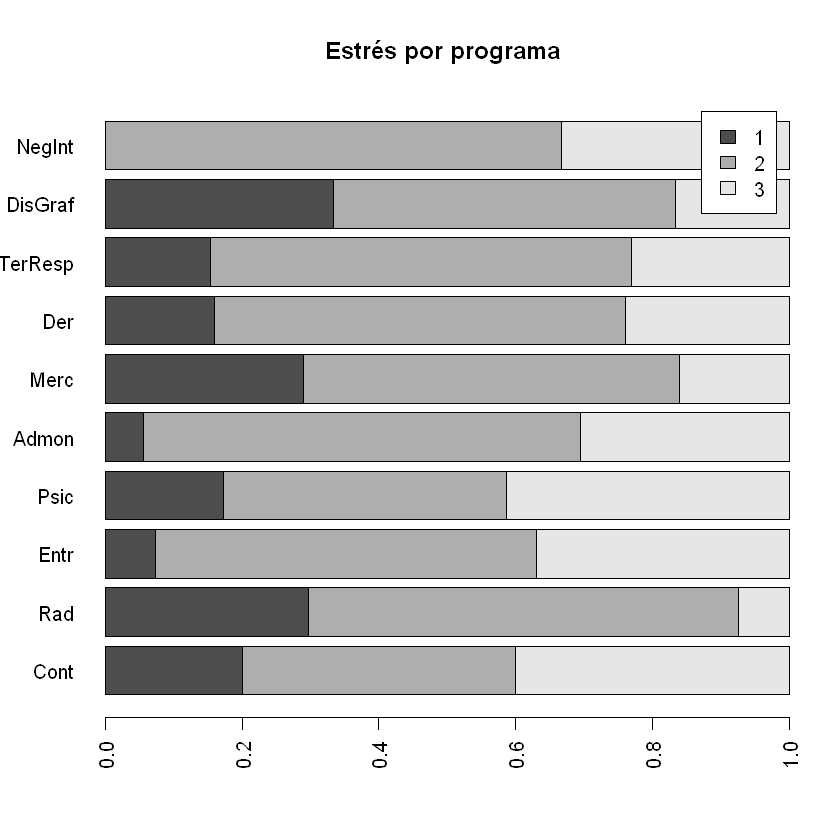

In [213]:
barplot(prop.table(ans_prog_tbl,2), horiz=TRUE,las=2, legend=TRUE, main="Estrés por programa")

                datos.programa
datos.ans_riesgo Cont Rad Entr Psic Admon Merc Der TerResp DisGraf NegInt
               1    2   8    2    5     2    9   4       2       4      0
               2    4  17   15   12    23   17  15       8       6      8
               3    4   2   10   12    11    5   6       3       2      4

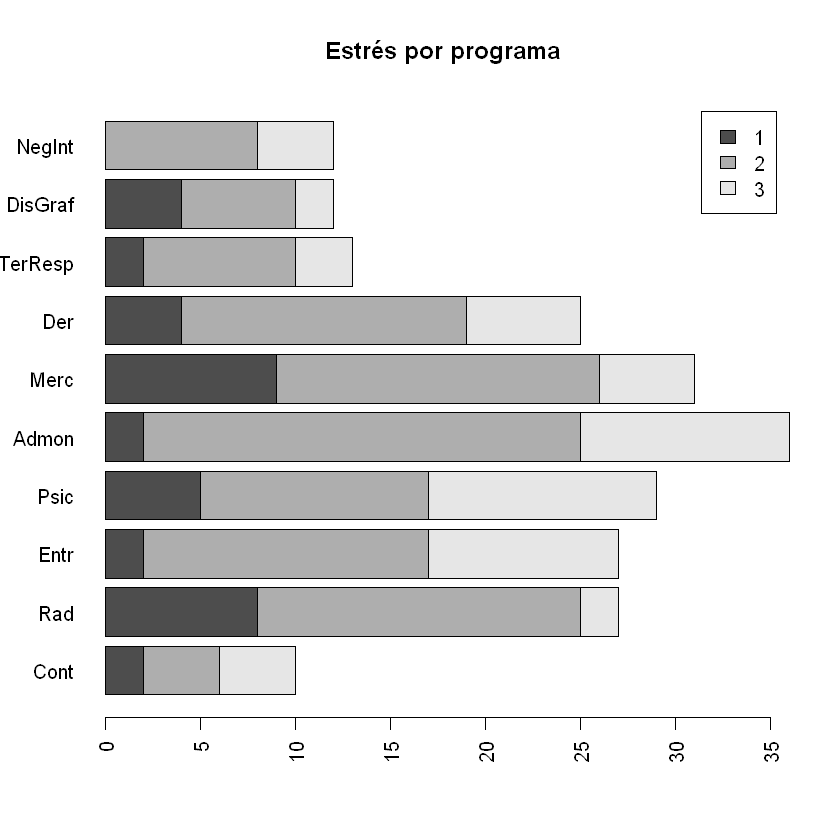

In [214]:
ans_prog_tbl
barplot(ans_prog_tbl, horiz=TRUE,las=2, legend=TRUE, main="Estrés por programa")

### Factores de estrés


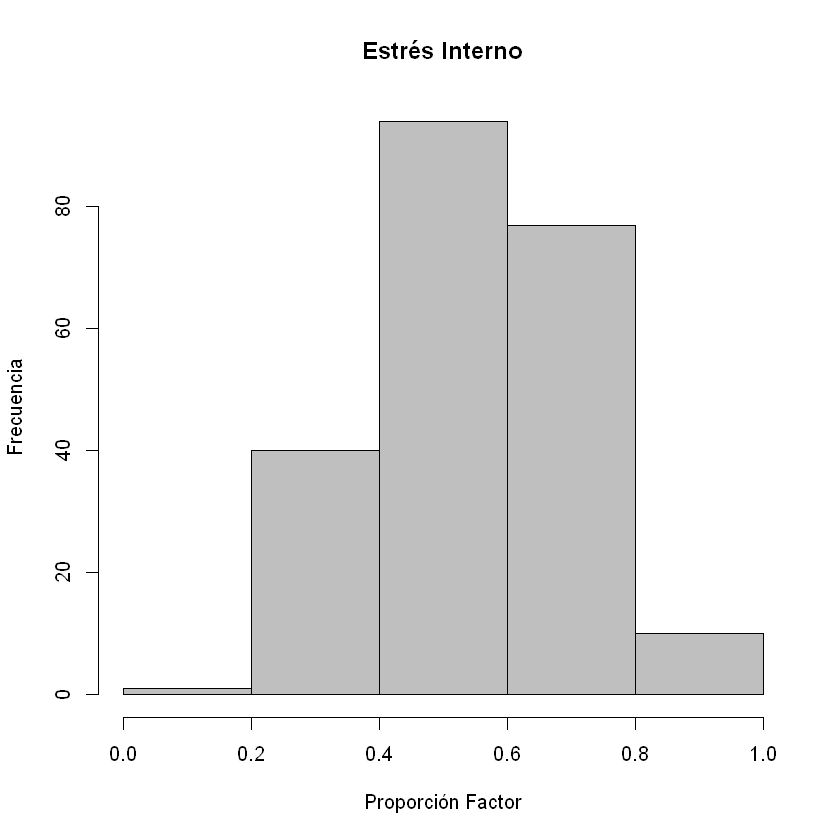

In [215]:
hist(estr_int/4, col="gray75", main="Estrés Interno", xlab="Proporción Factor", ylab="Frecuencia", breaks = 5)

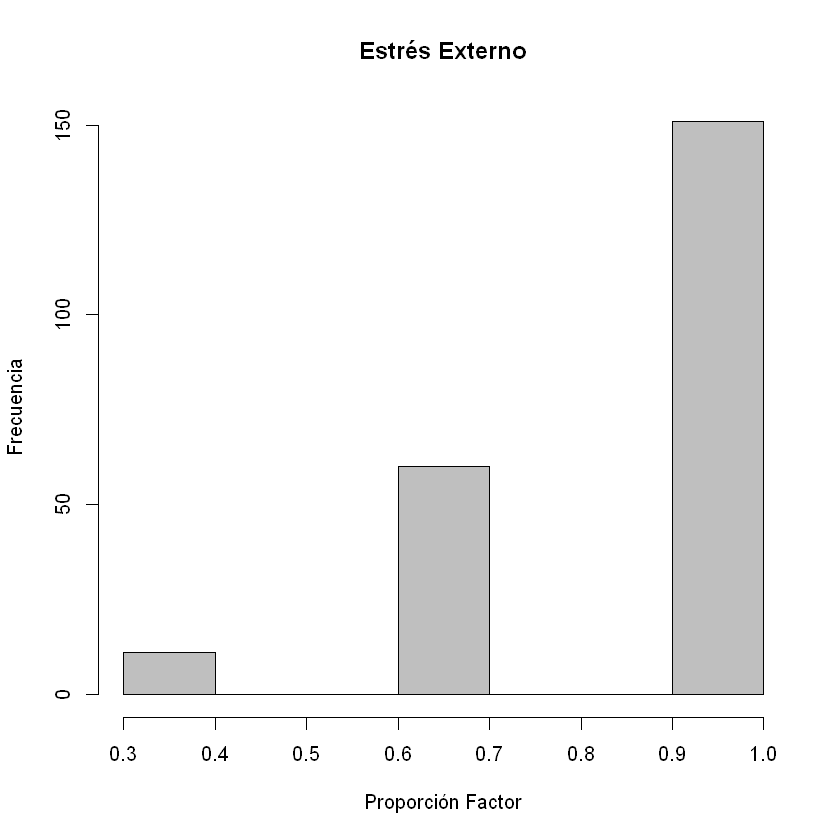

In [216]:
hist(estr_ext/3, col="gray75", main="Estrés Externo", xlab="Proporción Factor", ylab="Frecuencia", breaks = 5)

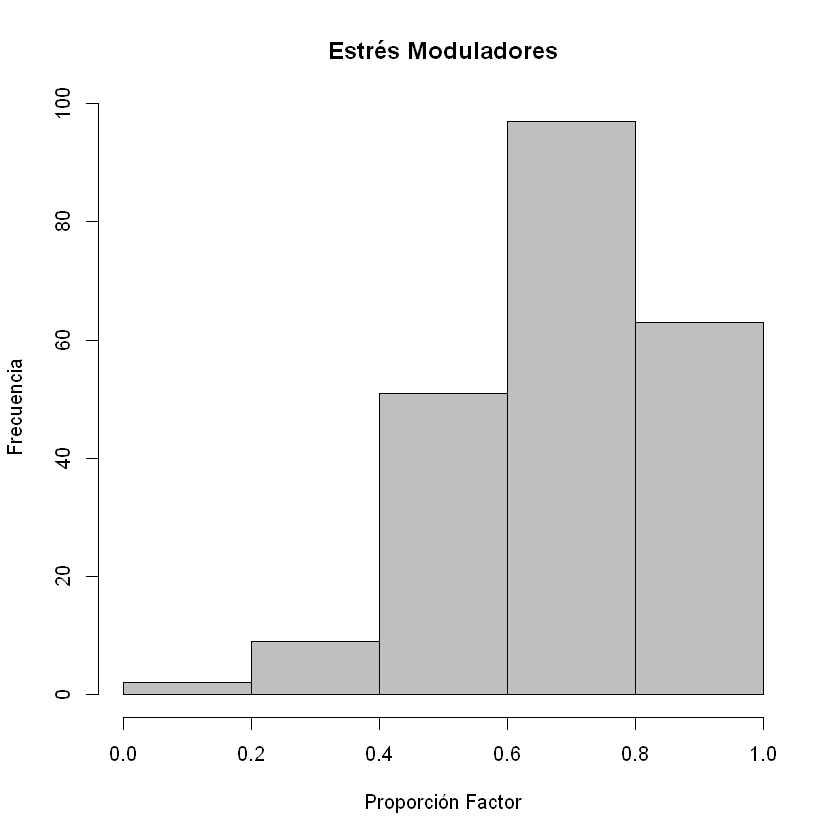

In [217]:
hist(estr_mod/4, col="gray75", main="Estrés Moduladores", xlab="Proporción Factor", ylab="Frecuencia", breaks = 5)

In [218]:
estr_proporciones_factores=data.frame(Internos=estr_int/4, Externos=estr_ext/3, Moduladores=estr_mod/4)

Internos    Externos Moduladores 
       0.56        0.88        0.74

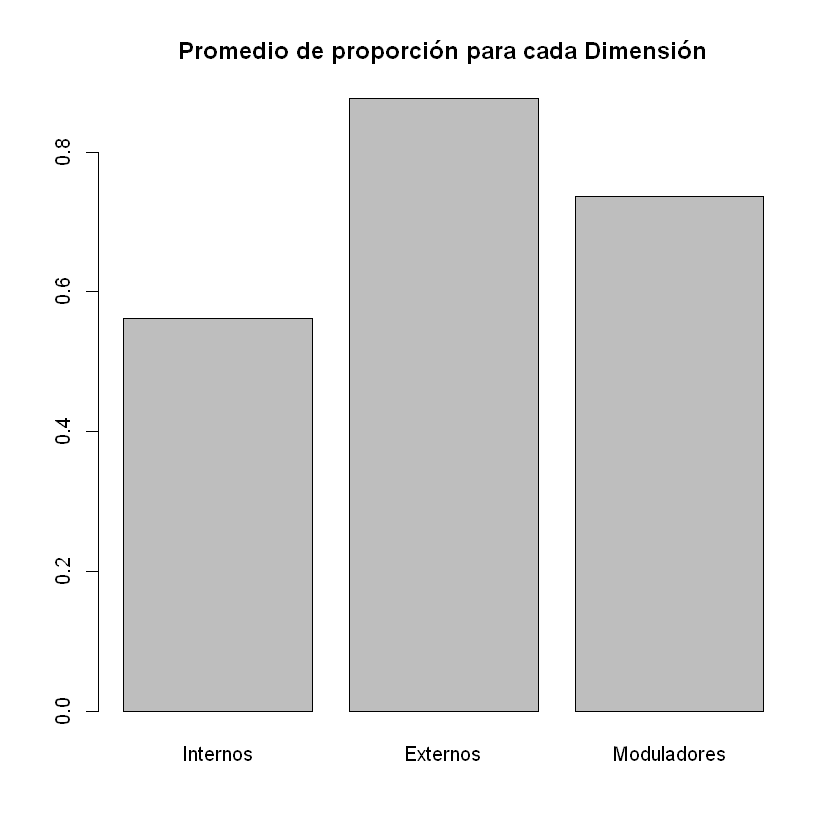

In [219]:
barplot(colMeans(estr_proporciones_factores), main="Promedio de proporción para cada Dimensión")
round(colMeans(estr_proporciones_factores),2)

## Correlación entre ansiedad y estrés


	Pearson's product-moment correlation

data:  estr_tot and ans_tot
t = -0.49128, df = 220, p-value = 0.6237
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.16406219  0.09900042
sample estimates:
        cor 
-0.03310422 


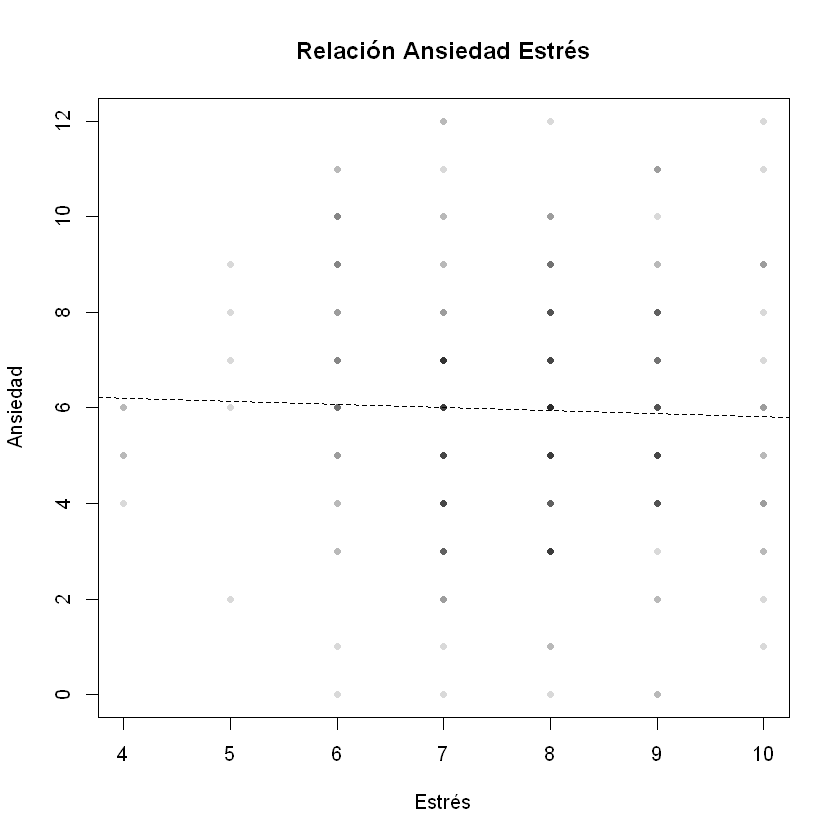

In [220]:
cor.test(estr_tot, ans_tot)
plot(estr_tot, ans_tot, pch=16, cex=0.8, col=rgb(0,0,0,0.15), main="Relación Ansiedad Estrés", xlab="Estrés", ylab="Ansiedad")
abline(lm(ans_tot~estr_tot),lty=2)#, col="red") # regression line (y~x) 

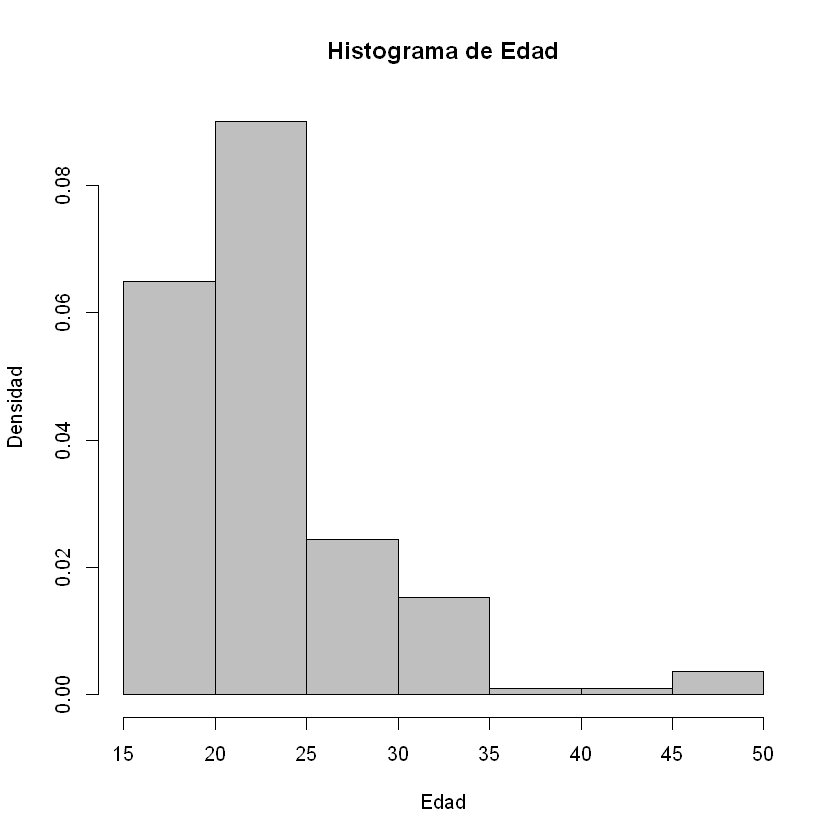

In [221]:
hist(datos$edad, col="gray75", main="Histograma de Edad",freq = F, xlab="Edad", ylab="Densidad")


Empleado y estudiante            Estudiante 
            0.7882883             0.2117117 

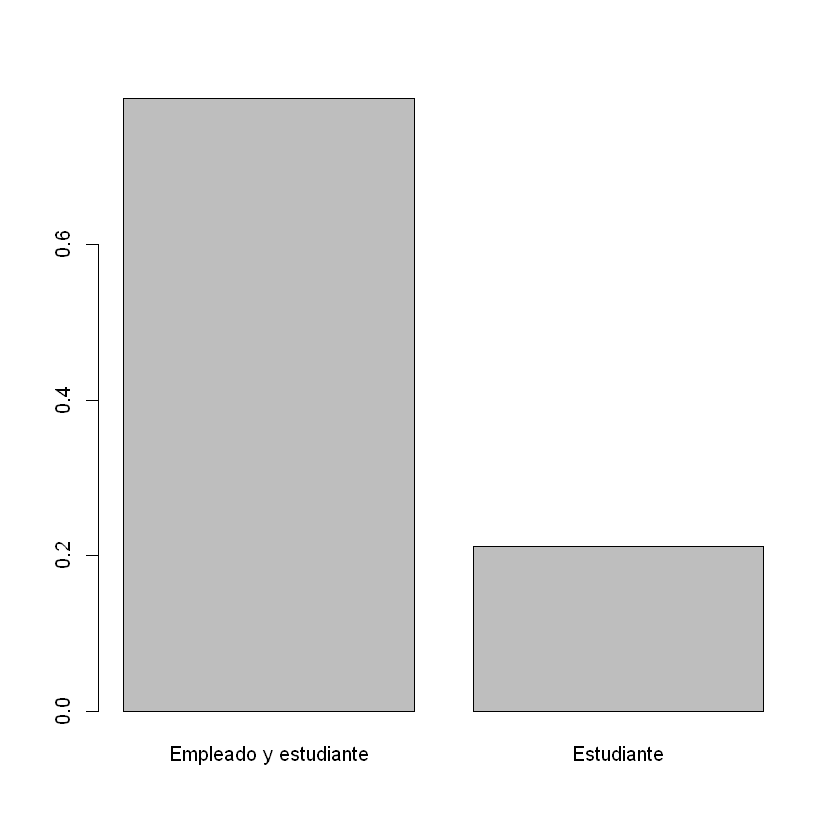

In [222]:
datos$ocup=factor(datos$ocup,labels=c("Empleado y estudiante","Estudiante"))
ocup_prop=prop.table(table(datos$ocup))
barplot(ocup_prop)
ocup_prop

## Correlación entre Edad y Riesgos


	Pearson's product-moment correlation

data:  datos$ans_riesgo and datos$edad
t = -1.998, df = 220, p-value = 0.04695
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.260592085 -0.001859337
sample estimates:
       cor 
-0.1334998 


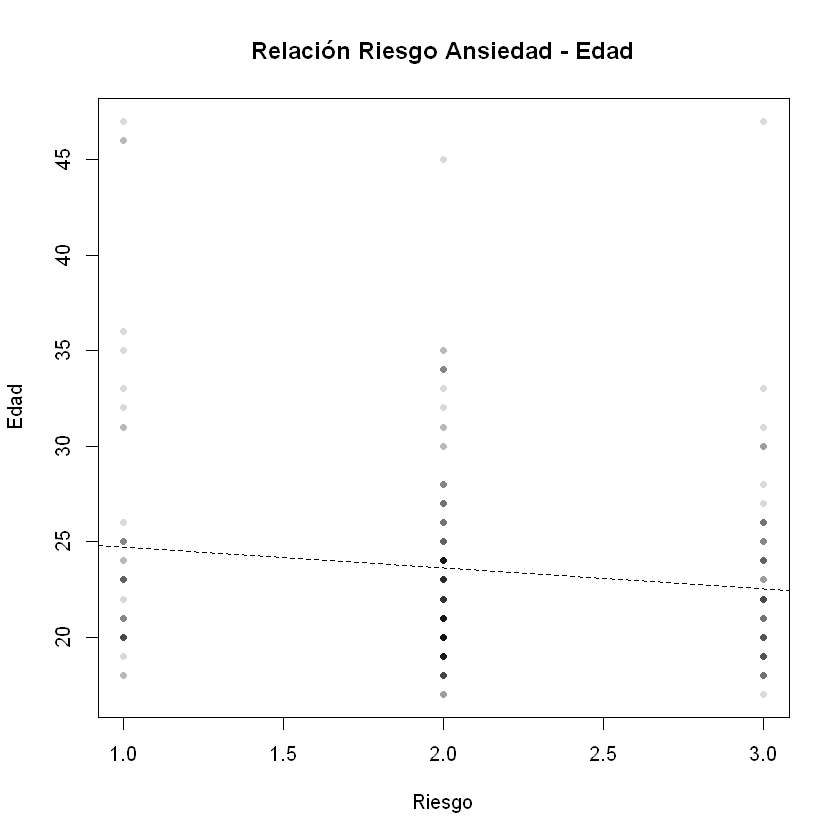

In [223]:
cor.test(datos$ans_riesgo,datos$edad)
plot(datos$ans_riesgo,datos$edad, pch=16, cex=0.8, col=rgb(0,0,0,0.15),
     main="Relación Riesgo Ansiedad - Edad", 
     xlab="Riesgo", 
     ylab="Edad")
abline(lm(datos$edad~datos$ans_riesgo),lty=2)#, col="red") # regression line (y~x) 

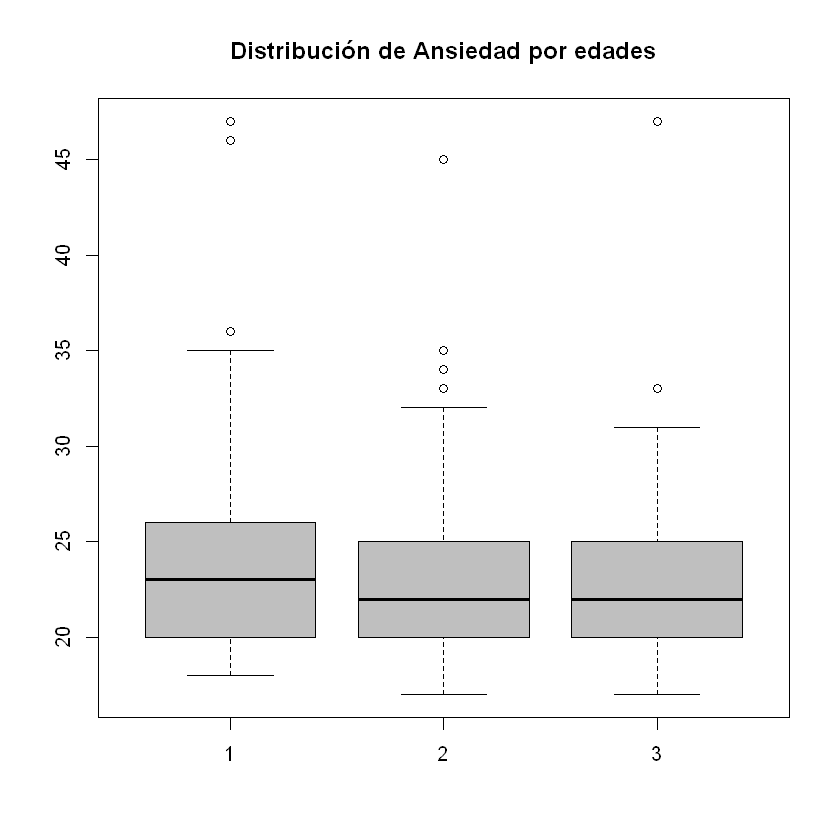

In [224]:
boxplot(datos$edad~factor(datos$ans_riesgo), 
        col="gray75", 
        main="Distribución de Ansiedad por edades")


	Pearson's product-moment correlation

data:  datos$estr_riesgo and datos$edad
t = -0.16753, df = 220, p-value = 0.8671
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1427548  0.1205584
sample estimates:
        cor 
-0.01129403 


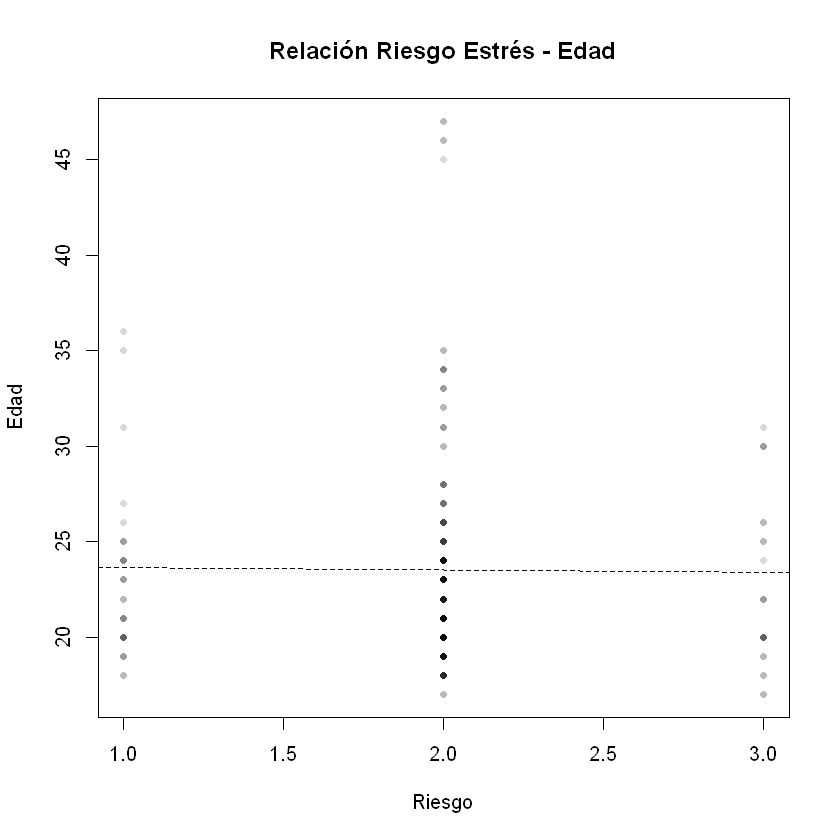

In [225]:
cor.test(datos$estr_riesgo,datos$edad)
plot(datos$estr_riesgo,datos$edad, pch=16, cex=0.8, col=rgb(0,0,0,0.15),
     main="Relación Riesgo Estrés - Edad", 
     xlab="Riesgo", 
     ylab="Edad")
abline(lm(datos$edad~datos$estr_riesgo),lty=2)#, col="red") # regression line (y~x) 

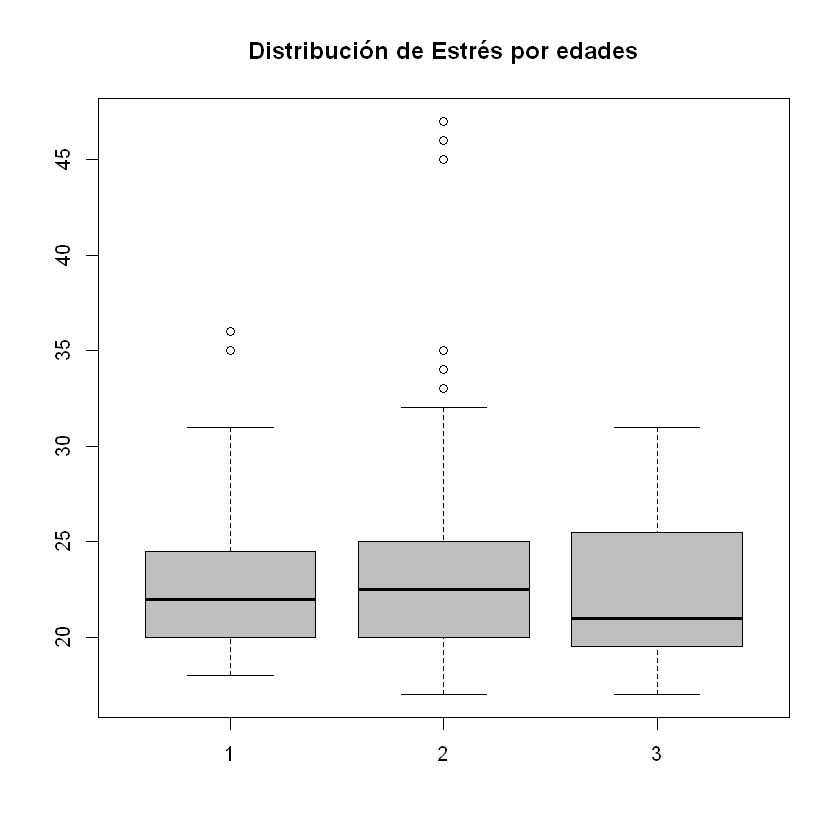

In [226]:
boxplot(datos$edad~factor(datos$estr_riesgo), 
        col="gray75", 
        main="Distribución de Estrés por edades")

                 datos.ocup
datos.estr_riesgo Empleado y estudiante Estudiante
                1                  0.12       0.23
                2                  0.76       0.70
                3                  0.12       0.06

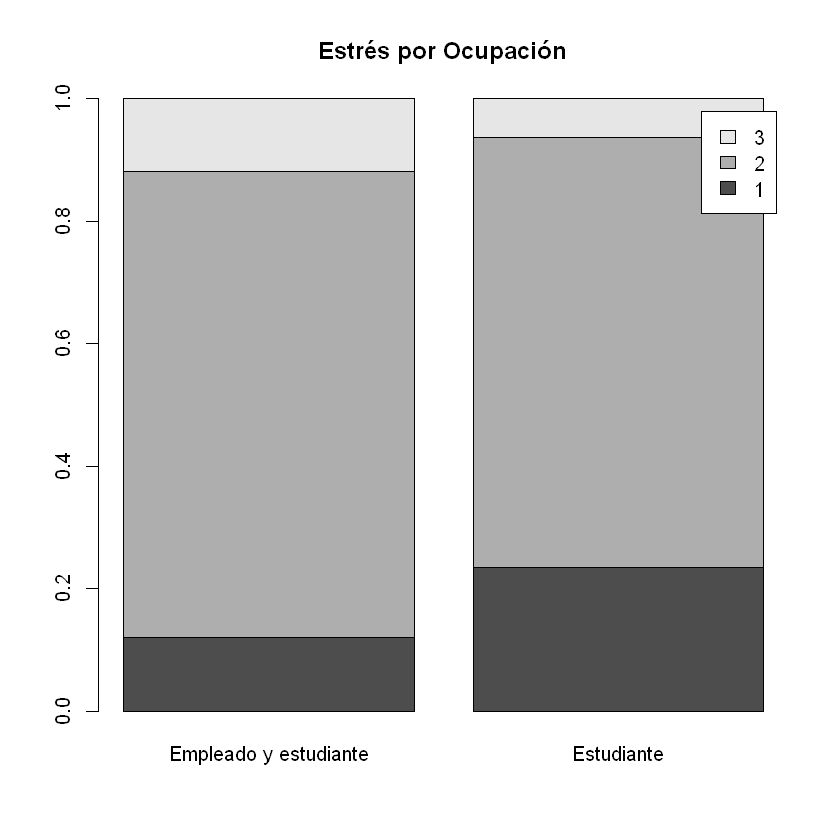

In [227]:
estr_lab_tbl=table(data.frame(datos$estr_riesgo,datos$ocup))
round(prop.table(estr_lab_tbl,2),2)
# barplot(prop.table(estr_lab_tbl,2), horiz=TRUE,las=2, legend=TRUE, main="Estrés por Ocupación")
barplot(prop.table(estr_lab_tbl,2), legend=TRUE, main="Estrés por Ocupación")

                 datos.ocup
datos.estr_riesgo Empleado y estudiante Estudiante
                1                    21         11
                2                   133         33
                3                    21          3

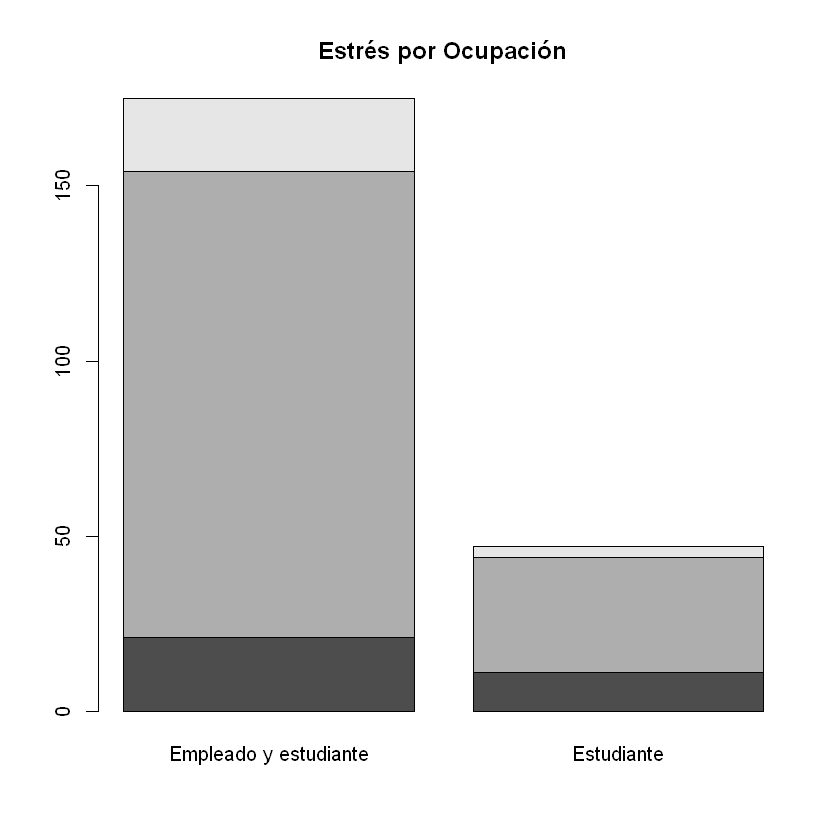

In [228]:
estr_lab_tbl
barplot(estr_lab_tbl, main="Estrés por Ocupación")

                datos.ocup
datos.ans_riesgo Empleado y estudiante Estudiante
               1                  0.17       0.19
               2                  0.54       0.64
               3                  0.29       0.17

                datos.ocup
datos.ans_riesgo Empleado y estudiante Estudiante
               1                    29          9
               2                    95         30
               3                    51          8

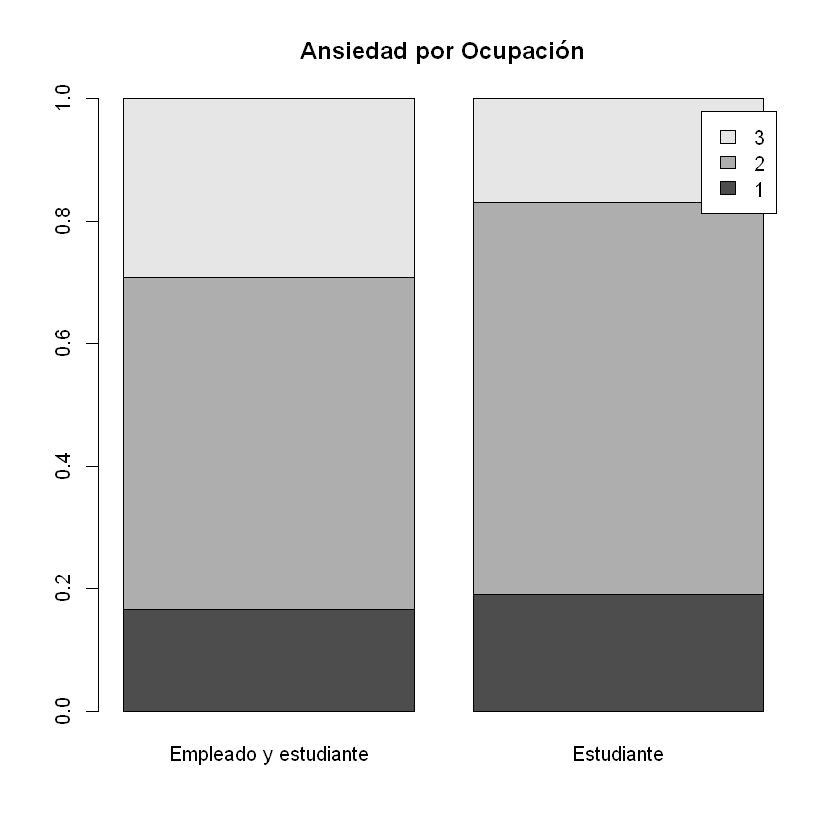

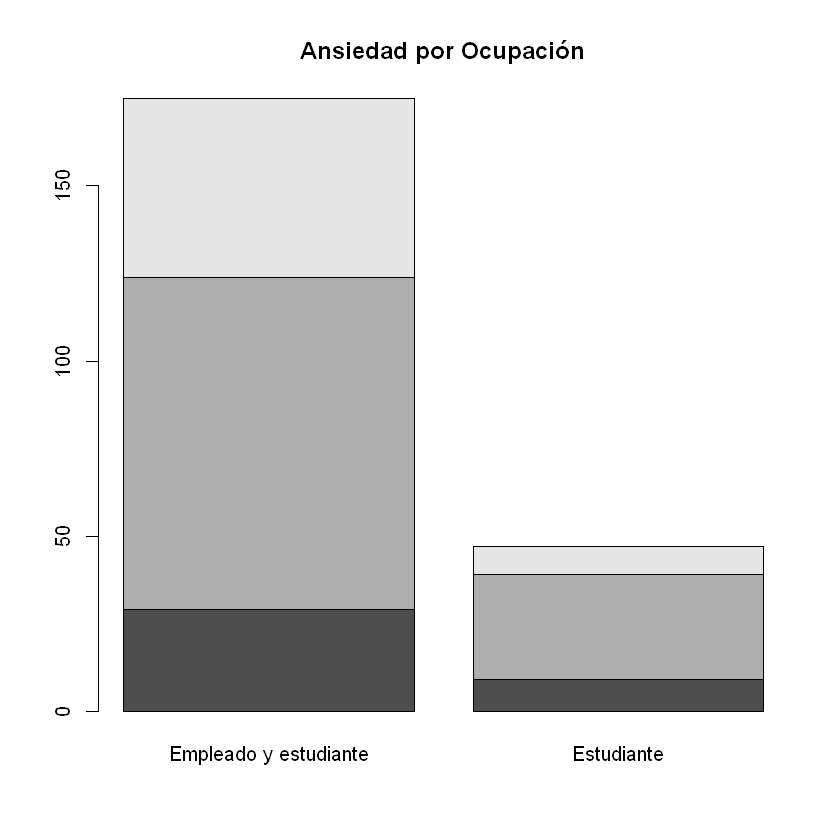

In [229]:
ans_lab_tbl=table(data.frame(datos$ans_riesgo,datos$ocup))
round(prop.table(ans_lab_tbl,2),2)
# barplot(prop.table(estr_lab_tbl,2), horiz=TRUE,las=2, legend=TRUE, main="Estrés por Ocupación")
barplot(prop.table(ans_lab_tbl,2), legend=TRUE, main="Ansiedad por Ocupación")
ans_lab_tbl
barplot(ans_lab_tbl, main="Ansiedad por Ocupación")

In [230]:
datos$estrato=factor(datos$estrato)

                datos.estrato
datos.ans_riesgo    1    2    3    4
               1 0.18 0.18 0.18 0.07
               2 0.64 0.54 0.56 0.64
               3 0.18 0.28 0.26 0.29

                datos.estrato
datos.ans_riesgo  1  2  3  4
               1  2 16 19  1
               2  7 48 61  9
               3  2 25 28  4

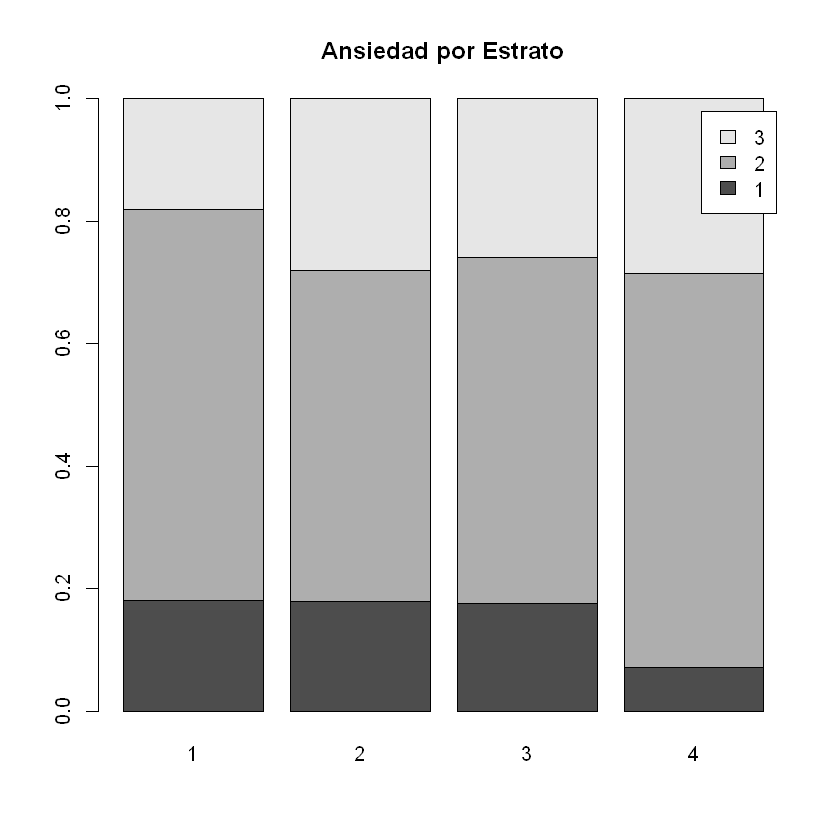

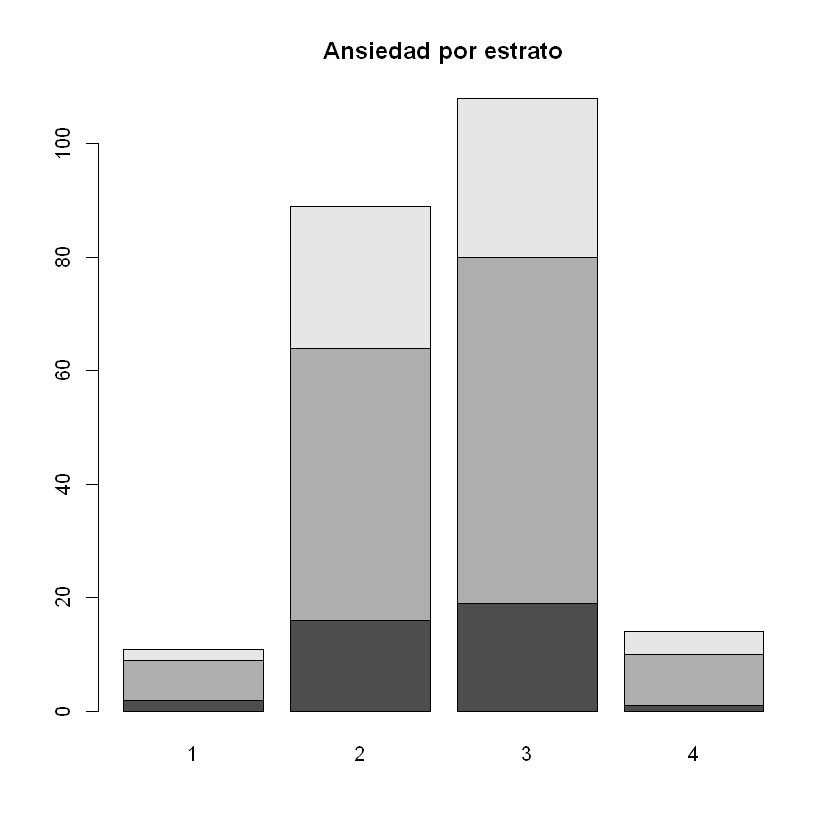

In [231]:
ans_str_tbl=table(data.frame(datos$ans_riesgo,datos$estrato))
round(prop.table(ans_str_tbl,2),2)
# barplot(prop.table(estr_lab_tbl,2), horiz=TRUE,las=2, legend=TRUE, main="Estrés por Ocupación")
barplot(prop.table(ans_str_tbl,2), legend=TRUE, main="Ansiedad por Estrato")
ans_str_tbl
barplot(ans_str_tbl, main="Ansiedad por estrato")

                 datos.estrato
datos.estr_riesgo    1    2    3    4
                1 0.09 0.13 0.14 0.29
                2 0.73 0.73 0.79 0.57
                3 0.18 0.13 0.07 0.14

                 datos.estrato
datos.estr_riesgo  1  2  3  4
                1  1 12 15  4
                2  8 65 85  8
                3  2 12  8  2

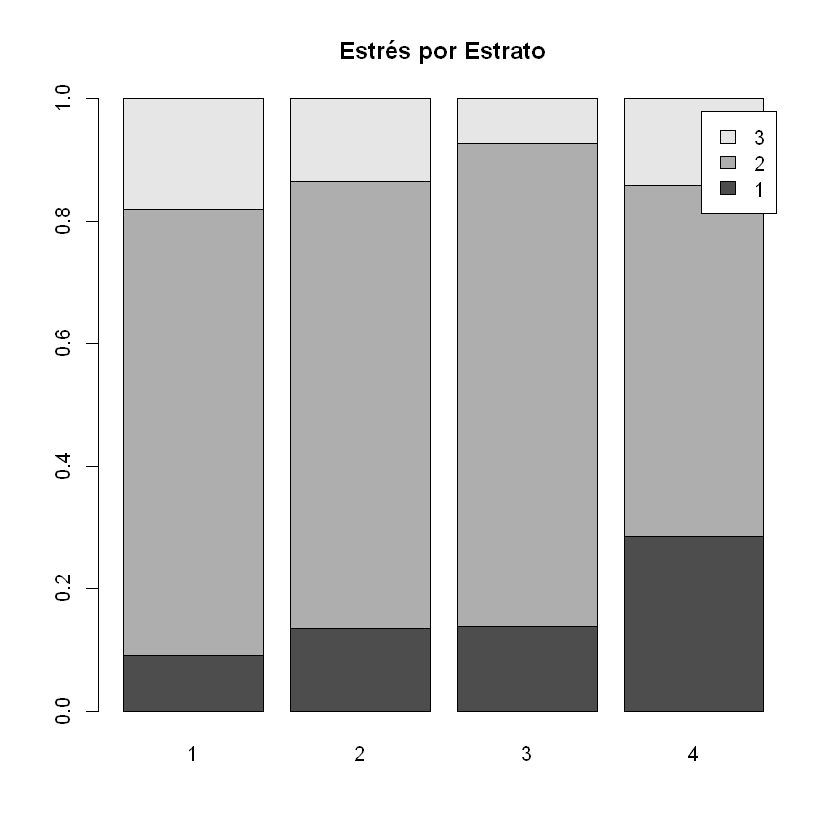

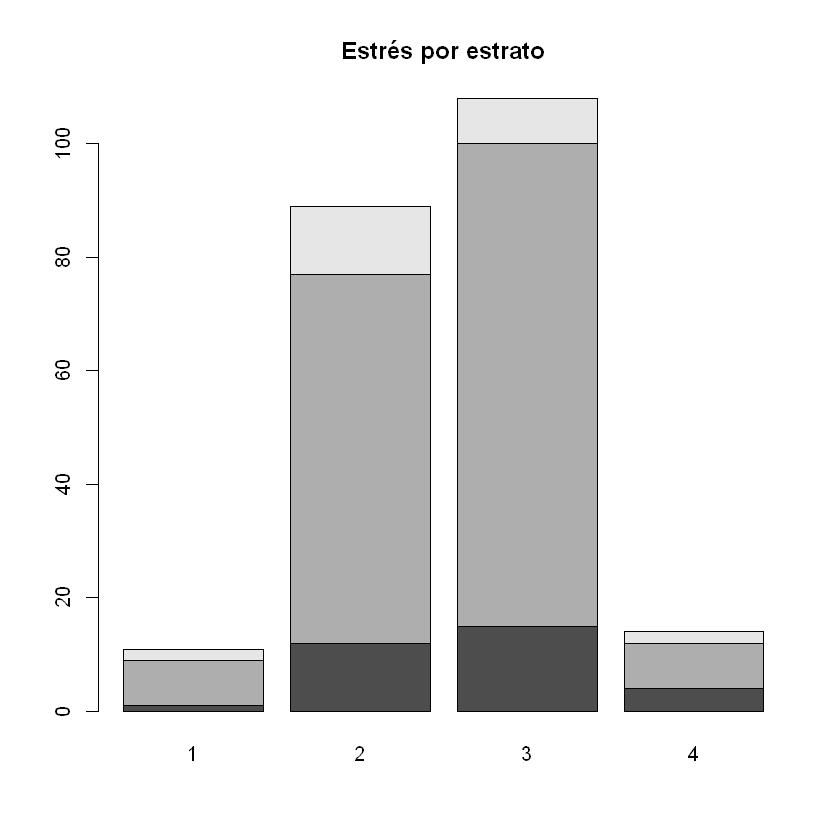

In [232]:
estr_str_tbl=table(data.frame(datos$estr_riesgo,datos$estrato))
round(prop.table(estr_str_tbl,2),2)
# barplot(prop.table(estr_lab_tbl,2), horiz=TRUE,las=2, legend=TRUE, main="Estrés por Ocupación")
barplot(prop.table(estr_str_tbl,2), legend=TRUE, main="Estrés por Estrato")
estr_str_tbl
barplot(estr_str_tbl, main="Estrés por estrato")